In [104]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

In [105]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [106]:
x_train.shape

(60000, 28, 28)

In [107]:
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))     

In [108]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [109]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [111]:
x_train.shape

(60000, 784)

In [112]:
model = Sequential()
model.add(Dense(128, input_shape = (x_train.shape[1], ), activation = 'sigmoid'))
model.add(Dense(64, activation = 'sigmoid'))
model.add(Dense(10, activation = 'softmax'))

In [113]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 128)               100480    
                                                                 
 dense_34 (Dense)            (None, 64)                8256      
                                                                 
 dense_35 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [114]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)  # Model training

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4652 - accuracy: 0.8813 - val_loss: 0.2071 - val_accuracy: 0.9379
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1750 - accuracy: 0.9488 - val_loss: 0.1458 - val_accuracy: 0.9559
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1210 - accuracy: 0.9637 - val_loss: 0.1094 - val_accuracy: 0.9659
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0904 - accuracy: 0.9732 - val_loss: 0.0954 - val_accuracy: 0.9701
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0697 - accuracy: 0.9801 - val_loss: 0.0940 - val_accuracy: 0.9716
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0558 - accuracy: 0.9834 - val_loss: 0.0789 - val_accuracy: 0.9748
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0446 - accuracy: 0.9868 - val_loss: 0.0774 - val_accuracy:

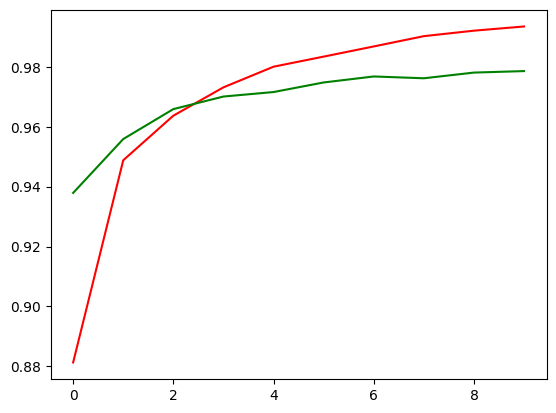

In [115]:
plt.plot(history.history['accuracy'], c='r')
plt.plot(history.history['val_accuracy'], c='g')


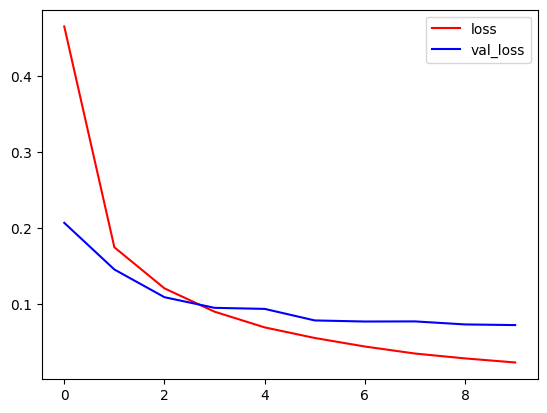

In [116]:
plt.plot(history.history['loss'], label = 'loss', color = 'red')
plt.plot(history.history['val_loss'], label = 'val_loss', color = 'blue')
plt.legend()

In [117]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 830us/step - loss: 0.0727 - accuracy: 0.9786
